In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Ön işleme için
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Sistem Kütüphaneleri
import os
import warnings
warnings.filterwarnings("ignore")
print("Uyarılar kapatıldı")

Uyarılar kapatıldı


BAŞLAMADAN ÖNCE ŞUNU BELİRTMEK İSTERİM

Bu deneyimlerimde kendimin yazmış olduğu kod  dışında araştırma yaparak Weka adlı java tabanlı uygulamada çok fazla denemeler yaptım ve Kaggle adlı platformda yapılanları Weka uygulamasıyla birlikte karşılaştırarak incelemem bana çok fazla deneyimleme fırsatı tanıdı.Hangi verileri kullanmam gerektiğini nelere öncelikle başlamam gerektiğini gördüm.
Diğerinden farklı 3 algoritmayı çıkarttım 3 class olduğu için
Bu uygulamada 8 adet algoritmayı konu aldım. 

In [2]:
veriSeti=pd.read_csv("column_3C.csv")

In [3]:
veriSeti

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
veriSeti.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [5]:
veriSeti.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
veriSeti.describe()
#2column olanla 3column arasında pelvic_tilt arada isim farkı var

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# NOT=Veri ön işleme seçimi olarak GreadSearch gibi algoritmalar kullanacağım.

Verisetimde %25 altı veya %75 üstündeki ayrıkı verilere baktım eğer veri setimizin %10 geçicek kadar ayrıkı veri varsa alttaki
durumlardan birini yapacaktım fakat görüldüğü üzere 3 veri olduğu için dokunmak istemedim.

1-Silme
2-Ortalama 
3-Baskılama

veyada normalizyon tekniklerinden birileri uygulayabilirim fakat !!! fazla bi başarı oranı değişimi olmadı hatta bazılarında düşüş yaşadım o yüzden yeri geldiği yerde verileri ona göre şekillendirdim !!!

Veri Görselleştirmede featurelardaki bağlam için kolerasyon sayısına ve görsel olarak veriyi inceleyip önemli feature almak daha iyi veya greadsearch  algoritması gibi en iyi verileri seçen algoritmalara başvurmak daha iyidir.

In [7]:
veriSeti[(veriSeti["pelvic_incidence"] >72.877696) & (veriSeti["pelvic_tilt"] >22.120395)&
         (veriSeti["lumbar_lordosis_angle"] >63.00000) & (veriSeti["sacral_slope"] >52.695888)&
         (veriSeti["pelvic_radius"] >125.467674) & (veriSeti["degree_spondylolisthesis"] >41.287352)]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Spondylolisthesis
83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,Spondylolisthesis
111,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,Spondylolisthesis


In [8]:
veriSeti[(veriSeti["pelvic_incidence"] <46.430294) & (veriSeti["pelvic_tilt"] <10.667069)&
         (veriSeti["lumbar_lordosis_angle"] <37.000000) & (veriSeti["sacral_slope"] <33.347122)&
         (veriSeti["pelvic_radius"] <110.709196	) & (veriSeti["degree_spondylolisthesis"] <1.603727)]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


# VERİ GÖRSELLEŞTİRME

In [9]:
class veri_Gorseli():
    def __init__(self,veriSeti):
        self.veriSeti=veriSeti
        print("Veri Görseli Nesnesi çağırıldı")
    def bar_pie(self):
        fig, axarr=plt.subplots(nrows=1,ncols=2, figsize=(8,5))
        veriSeti["class"].value_counts().plot(kind="bar",ax=axarr[0])
        veriSeti["class"].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[1])
        plt.tight_layout()
        plt.show()
    def plot_categorical(self):
        categorical_feature="class"
        fig, axarr=plt.subplots(nrows=2,ncols=4, figsize=(15,10))
        features=veriSeti.columns.values[:-1]
    
        counter=0
        
        veriSeti['class'].value_counts().plot.bar(ax=axarr[0,0])
        veriSeti['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=axarr[0,1])
        for i in range(2):
            for j in range(4):
                feature=features[counter]
                if (i==0 and j==0) or (i==0 and j==1):
                    continue
                else:
                    sns.swarmplot(x=categorical_feature,y=feature,
                             
                            data=veriSeti, 
                            ax=axarr[i, j])
                counter=counter+1
                if counter>=len(features):
                    break
    
        plt.tight_layout()
        plt.show()
    def Scatter_matrix(self):
        color_list = ['blue' if i=='Abnormal' else 'orange' for i in veriSeti.loc[:,"class"]]
        pd.plotting.scatter_matrix(veriSeti.loc[:, veriSeti.columns != "class"],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '0',
                                       edgecolor= "black")
        plt.show()
    def pairplot(self):
        sns.pairplot(veriSeti,hue="class",palette="Set2")
        plt.show()
    def correlation(self):
        corr=veriSeti.corr()
        fig, ax=plt.subplots(1,1,figsize=(12,8))
        sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

In [10]:
gorsel=veri_Gorseli(veriSeti)

Veri Görseli Nesnesi çağırıldı


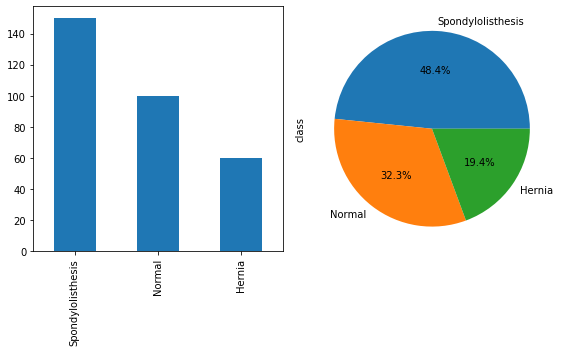

In [11]:
gorsel.bar_pie()

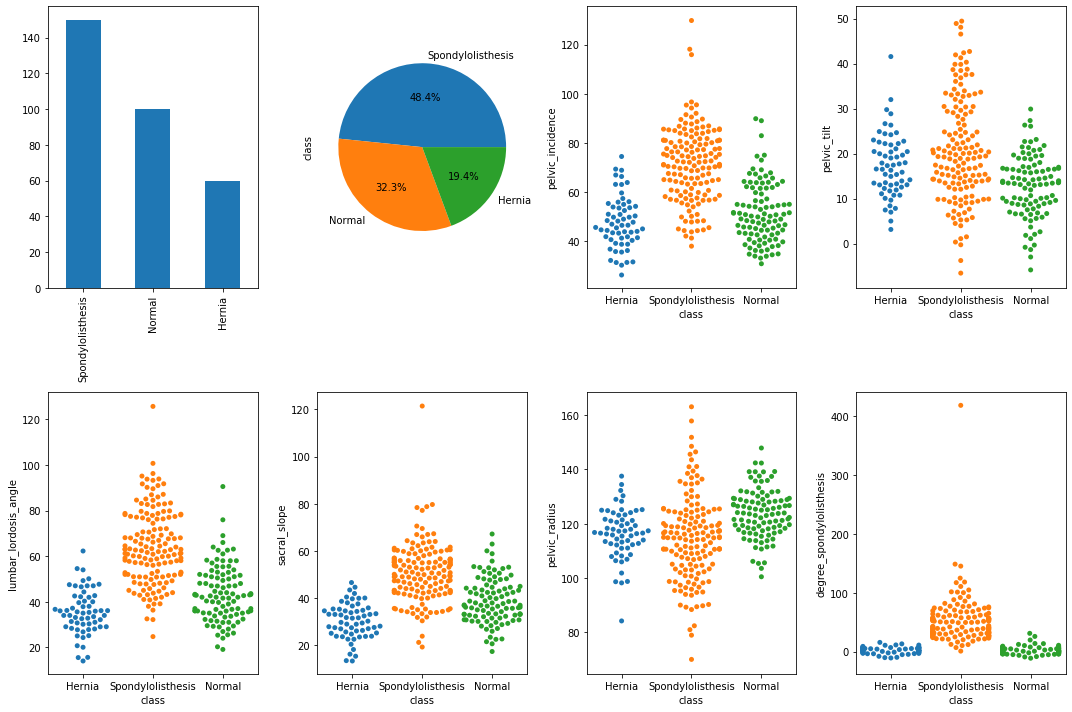

In [12]:
gorsel.plot_categorical()

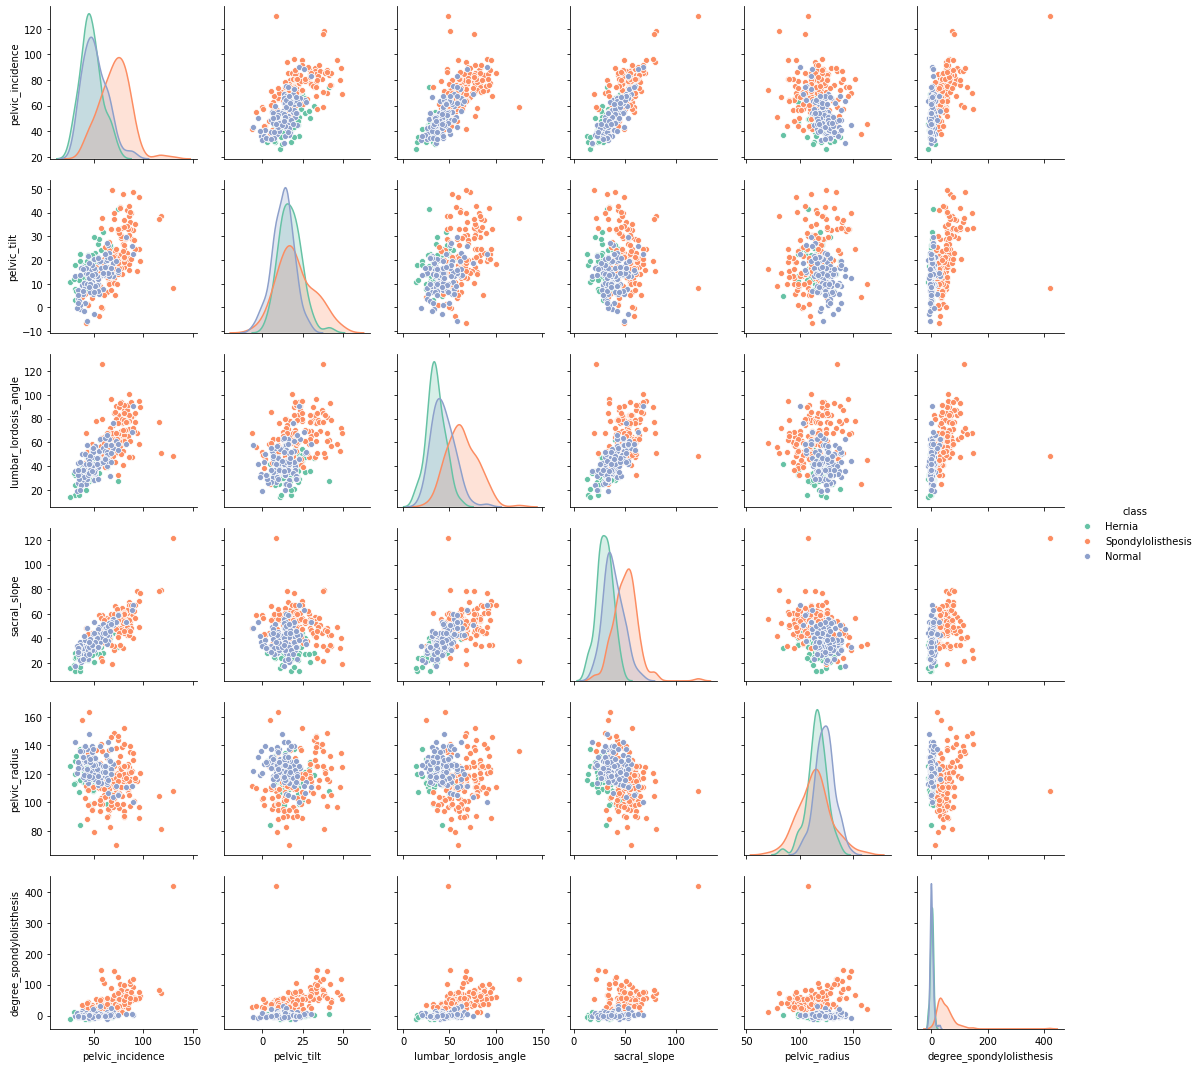

In [13]:
gorsel.pairplot()

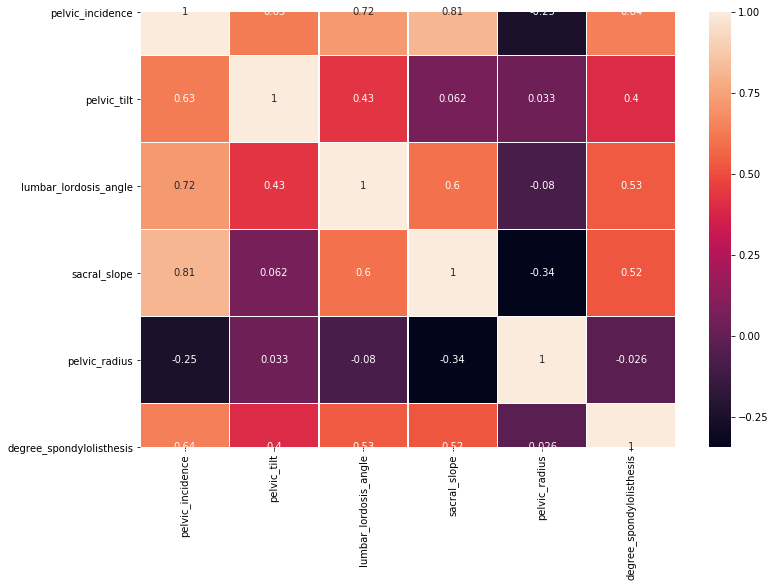

In [14]:
gorsel.correlation()

# MAKİNE ÖĞRENMESİ İLE TAHMİN ETME YÜZDESİ

In [15]:
#liner Regresyonu çok doğru bulmuyorum o 3 column olduğu için VE DENETİMSİZ ÖĞRENME DAHA BAŞARILI SONUÇ VERİR

In [16]:
#GÖZLEMLEDİĞİM KADARIYLA BU VERİ SETİNDE KNN veriyle oynasılmanı sevmiyor başarı oranı düşüyor

# TRAİN TEST KISMI

In [17]:
#Öncelikle verimi güzel bir hale getirdim
#Literatür göre test %33 random state 1 veya 42 alarak işlem devam ettim. Ben 1 aldım Sizde derlediğinizde sonuçlar değişmesin

In [18]:
#verilerimi daha yüksek sonuçlar vermesi için verisetimle her algoritma için farklı ayarlar yaptım

In [19]:
from sklearn.model_selection import train_test_split
x,y = veriSeti.loc[:,veriSeti.columns != 'class'], veriSeti.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 1)

In [20]:
#KNN algoritması
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 100 komşu kadar bakmak istedim
neig = np.arange(1, 100)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))


In [21]:
print("En yüksek başarı oranı {} \nK-Komşu sayısı= {} bağlı olarak ".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

En yüksek başarı oranı 0.8737864077669902 
K-Komşu sayısı= 7 bağlı olarak 


In [22]:
#burda veri değiştirdim çunku BAŞARI ORAN DÜŞÜYORDU
##encoder ve tranform yaptım

In [23]:
from sklearn.model_selection import train_test_split
x,y = veriSeti.loc[:,veriSeti.columns != 'class'], veriSeti.loc[:,'class']
x=StandardScaler().fit_transform(x)
labelEncoder=LabelEncoder()
y=labelEncoder.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 1)

In [24]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_test_log = round(logreg.score(x_test, y_test) ,15)
acc_test_log

0.864077669902913

In [25]:
#Support Vector Machines 
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
acc_test_svc = round(svc.score(x_test, y_test) , 4)
acc_test_svc

0.8252

In [26]:
#Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(dual=False)  
linear_svc.fit(x_train, y_train)
acc_test_linear_svc = round(linear_svc.score(x_test, y_test) , 4)
acc_test_linear_svc

0.8835

In [27]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_test_gaussian = round(gaussian.score(x_test, y_test) , 4)
acc_test_gaussian

0.8252

In [28]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_test_decision_tree = round(decision_tree.score(x_test, y_test) , 4)
acc_test_decision_tree

0.7767

In [29]:
#BURADA BAŞARI ORANI DEĞİŞTİĞİ İÇİN BU VERİYE ÇEVİREREK KULLANDIM

In [30]:
x,y = veriSeti.loc[:,veriSeti.columns != 'class'], veriSeti.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 1)

In [31]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
acc_test_sgd = sgd.score(x_test, y_test) 
acc_test_sgd

0.8349514563106796

In [32]:
from sklearn.model_selection import GridSearchCV
target_name="class"
X=veriSeti.drop(target_name, axis=1)
y=veriSeti[target_name]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=1)
best_score=0
gammas=[0.001, 0.01, 0.1, 1, 10, 100]
Cs=[0.001, 0.01, 0.1, 1, 10, 100]
kernels=['rbf', 'linear']
    
for gamma in gammas:
    for C in Cs:
        for kernel in kernels:
            svm=SVC(kernel=kernel,gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            score=svm.score(X_test, y_test)

            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'kernel':kernel, 'C':C, 'gamma':gamma}
        
print("best score:",best_score)
    

best score: 0.8932038834951457


# SONUÇ OLARAK İNCELEDİĞİMDE EN BAŞARILI ALGORİTMALAR

In [35]:
#Liner Svc gridSearch yapınca başarı oranı düştü oyüzden ona uygulamadım.
#GÖZLEMLEDİĞİM SONUÇ GRİDSEARCH svc oranı 3 colums başarılı olduğu gördüm.
#SON OLARAK BU ÖDEVLE 3 ÖZELLİK VE YUKARISI İÇİN AYRI ALGORİTMALARDA BAŞARI ELDE EDİCEĞİMİ GÖRDÜM HER ALGORİTMA VERİSETİNE
#UYMADIĞINI TEYİT ETTİM.

In [34]:
#Tüm feature alarak başarı gösteren en iyi algoritmalar 
#GridSearch ile SVC başarı oranı = 0.8932 
#Linear SVC =0.8835